In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_csv('telecom view1.csv',)
df.head(7)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,none,Yes,No,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,none,Yes,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,none,Yes,No,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
5,32750-TEL,Male,24,No,Telangana,9,2,Deal 5,Yes,No,...,Credit Card,69.4,571.45,0.00,0,150.93,722.38,Stayed,Others,Others
6,84741-MAH,Female,66,Yes,Maharashtra,9,23,Deal 1,Yes,No,...,Bank Withdrawal,109.7,7904.25,0.00,0,707.16,8611.41,Stayed,Others,Others


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   6007 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                6007 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [260]:
df.isnull().sum()

Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
Churn_Cate

In [261]:
(df.isnull().mean())*100

Customer_ID                    0.0
Gender                         0.0
Age                            0.0
Married                        0.0
State                          0.0
Number_of_Referrals            0.0
Tenure_in_Months               0.0
Value_Deal                     0.0
Phone_Service                  0.0
Multiple_Lines                 0.0
Internet_Service               0.0
Internet_Type                  0.0
Online_Security                0.0
Online_Backup                  0.0
Device_Protection_Plan         0.0
Premium_Support                0.0
Streaming_TV                   0.0
Streaming_Movies               0.0
Streaming_Music                0.0
Unlimited_Data                 0.0
Contract                       0.0
Paperless_Billing              0.0
Payment_Method                 0.0
Monthly_Charge                 0.0
Total_Charges                  0.0
Total_Refunds                  0.0
Total_Extra_Data_Charges       0.0
Total_Long_Distance_Charges    0.0
Total_Revenue       

In [262]:
df.describe()

,Age,Number_of_Referrals,Tenure_in_Months,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
count,6007.000000,6007.000000,6007.00000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000,6007.000000
mean,47.289163,7.439820,17.39454,65.087598,2430.986173,2.038612,7.015149,797.283311,3233.246021
std,16.805110,4.622369,10.59292,31.067808,2267.481294,8.065520,25.405737,854.858841,2856.181082
min,18.000000,0.000000,1.00000,-10.000000,19.100000,0.000000,0.000000,0.000000,21.610000
25%,33.000000,3.000000,8.00000,35.950000,539.950000,0.000000,0.000000,107.085000,833.685000
50%,47.000000,7.000000,17.00000,71.100000,1556.850000,0.000000,0.000000,470.220000,2367.150000
75%,60.000000,11.000000,27.00000,90.450000,4013.900000,0.000000,0.000000,1269.840000,5105.685000
max,84.000000,15.000000,36.00000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [263]:
df.duplicated().sum()

0

In [264]:
df.head(2)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,none,Yes,No,...,Credit Card,65.6,593.3,0.00,0,381.51,974.81,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,none,Yes,Yes,...,Credit Card,-4.0,542.4,38.33,10,96.21,610.28,Stayed,Others,Others


In [265]:
df.drop(columns=['Customer_ID','Churn_Category','Churn_Reason'],inplace=True)

In [266]:
df.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [267]:
from sklearn.preprocessing import LabelEncoder
gd=LabelEncoder()
col=df[['Gender','Married', 'State',
       'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method','Customer_Status']]
col
for i in col:
    df[i]=gd.fit_transform(df[i])
df
# stayed ==1
# churned ==0

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,1,35,0,4,7,27,5,1,0,1,...,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,0,45,1,12,14,13,5,1,1,1,...,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,51,0,21,4,35,4,1,0,1,...,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,79,0,9,3,21,3,1,0,1,...,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,80,0,17,3,8,5,1,0,1,...,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,0,41,0,19,6,33,5,1,1,1,...,0,1,1,74.40,896.75,0.00,0,37.96,934.71,0
6003,1,51,1,6,0,19,0,0,0,1,...,2,0,1,45.25,3139.80,0.00,0,0.00,3139.80,1
6004,0,65,1,10,14,25,5,1,1,1,...,0,1,0,74.95,2869.85,0.00,0,599.64,3469.49,0
6005,1,23,0,13,2,10,5,1,1,1,...,1,1,1,70.15,4480.70,0.00,0,2107.52,6588.22,1


In [268]:
x=df.drop(columns='Customer_Status')
y=df[['Customer_Status']]

In [269]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [270]:
len(x_train)

4805

In [271]:
len(x_test)

1202

In [272]:
# training the model

In [273]:
from sklearn.ensemble import RandomForestClassifier

In [274]:
model=RandomForestClassifier(n_estimators=100,random_state=42)

In [275]:
model.fit(x_train,y_train)

C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [276]:
y_pred=model.predict(x_test)

In [277]:
from sklearn.model_selection import cross_val_score

In [278]:
np.mean(cross_val_score(model,x,y,cv=5))

C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

0.8516753232539163

In [279]:
from sklearn.metrics import classification_report,confusion_matrix

In [280]:
confusion_matrix(y_test,y_pred)

array([[239, 122],
       [ 54, 787]], dtype=int64)

In [281]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.66      0.73       361
           1       0.87      0.94      0.90       841

    accuracy                           0.85      1202
   macro avg       0.84      0.80      0.82      1202
weighted avg       0.85      0.85      0.85      1202



In [282]:
model.feature_importances_

array([0.00979801, 0.06595203, 0.00969014, 0.04273976, 0.03753659,
       0.04634721, 0.02178845, 0.00360385, 0.00866602, 0.01533938,
       0.02959965, 0.01670924, 0.00941645, 0.00822843, 0.01486226,
       0.00838477, 0.00808833, 0.00900695, 0.00694168, 0.13788952,
       0.01306115, 0.01918136, 0.09453256, 0.12291578, 0.00729352,
       0.01245538, 0.08439347, 0.13557806])

In [283]:
np.shape(model.feature_importances_)

(28,)

In [284]:
np.shape(df.columns)

(29,)

In [285]:
df.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [ ]:
# taking most important features only

In [286]:
df1=pd.DataFrame({'feature':x.columns,'feature_importance':model.feature_importances_})
df1=df1.sort_values('feature_importance',ascending=False)
df1

,feature,feature_importance
19,Contract,0.137890
27,Total_Revenue,0.135578
23,Total_Charges,0.122916
22,Monthly_Charge,0.094533
26,Total_Long_Distance_Charges,0.084393
1,Age,0.065952
5,Tenure_in_Months,0.046347
3,State,0.042740
4,Number_of_Referrals,0.037537
10,Internet_Type,0.029600


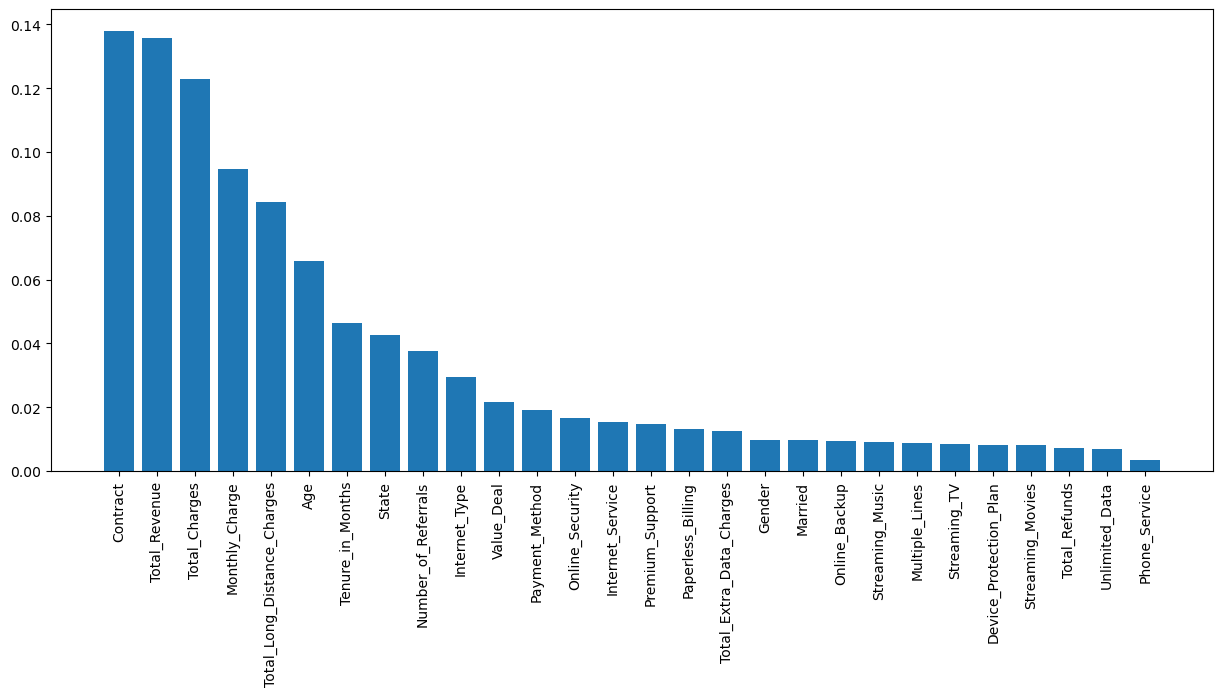

In [287]:
plt.figure(figsize=(15,6))
plt.bar(df1['feature'],df1['feature_importance'])
plt.xticks(rotation='vertical')
plt.show()

In [288]:
df.columns

Index(['Gender', 'Age', 'Married', 'State', 'Number_of_Referrals',
       'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
       'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
       'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV',
       'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract',
       'Paperless_Billing', 'Payment_Method', 'Monthly_Charge',
       'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges',
       'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status'],
      dtype='object')

In [289]:
main_x=df[['Age','State','Number_of_Referrals','Tenure_in_Months','Value_Deal','Internet_Type','Contract','Monthly_Charge','Total_Charges','Total_Long_Distance_Charges','Total_Revenue']]
main_x

,Age,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Internet_Type,Contract,Monthly_Charge,Total_Charges,Total_Long_Distance_Charges,Total_Revenue
0,35,4,7,27,5,0,1,65.60,593.30,381.51,974.81
1,45,12,14,13,5,0,0,-4.00,542.40,96.21,610.28
2,51,21,4,35,4,2,0,73.90,280.85,134.60,415.45
3,79,9,3,21,3,2,0,98.00,1237.85,361.66,1599.51
4,80,17,3,8,5,2,0,83.90,267.40,22.14,289.54
...,...,...,...,...,...,...,...,...,...,...,...
6002,41,19,6,33,5,2,0,74.40,896.75,37.96,934.71
6003,51,6,0,19,0,1,2,45.25,3139.80,0.00,3139.80
6004,65,10,14,25,5,2,0,74.95,2869.85,599.64,3469.49
6005,23,13,2,10,5,1,1,70.15,4480.70,2107.52,6588.22


In [290]:
np.mean(cross_val_score(model,main_x,y,cv=5))

C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

0.8428503146989268

In [291]:
#x=df.drop(columns='Customer_Status')
#y=df[['Customer_Status']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(main_x,y,test_size=0.2,random_state=42)

In [292]:
x_train

,Age,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Internet_Type,Contract,Monthly_Charge,Total_Charges,Total_Long_Distance_Charges,Total_Revenue
5632,27,10,15,14,5,2,1,90.65,3974.15,1045.00,5019.15
5838,65,13,6,31,1,0,2,84.35,3858.05,1386.00,5244.05
2348,26,0,14,22,5,2,1,116.60,7049.50,2654.40,9703.90
5332,54,10,0,7,5,3,2,19.70,452.55,729.84,1182.39
5661,30,0,6,4,5,1,0,50.20,668.85,56.70,725.55
...,...,...,...,...,...,...,...,...,...,...,...
3772,41,0,1,26,3,1,1,64.15,1274.45,675.60,2050.05
5191,58,19,1,35,5,2,0,97.35,2119.50,190.26,2309.76
5226,51,10,11,26,1,2,0,99.45,4138.05,1455.30,5702.89
5390,21,18,2,6,5,3,0,21.10,385.55,578.34,963.89


In [293]:
np.mean(cross_val_score(model,main_x,y,cv=5))

C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

0.8428503146989268

In [294]:
model1=RandomForestClassifier(n_estimators=100,random_state=42)
model1.fit(x_train,y_train)


C:\Users\sahus\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [ ]:
# Testing on the same dataset

In [295]:
model1.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1])

In [296]:
--------------------------------------------------

SyntaxError: invalid syntax (2482872719.py, line 1)

In [297]:
# prediction on a different dataset

In [310]:
ff=pd.read_csv('telecom view2 join.csv')
ff

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,Bank Withdrawal,72.10,72.10,0.0,0,7.77,79.87,Joined,Others,Others
1,57256-BIH,Female,18,No,Bihar,9,7,none,Yes,No,...,Credit Card,19.85,57.20,0.0,0,9.36,66.56,Joined,Others,Others
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,Credit Card,44.30,44.30,0.0,0,42.95,87.25,Joined,Others,Others
3,66612-KAR,Female,58,Yes,Karnataka,11,18,none,Yes,No,...,Credit Card,19.95,58.00,0.0,0,8.07,66.07,Joined,Others,Others
4,22119-WES,Male,31,Yes,West Bengal,5,5,none,Yes,No,...,Credit Card,20.05,33.70,0.0,0,3.62,37.32,Joined,Others,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,31412-HAR,Female,81,Yes,Haryana,14,29,none,Yes,No,...,Bank Withdrawal,19.20,37.20,0.0,0,14.06,51.26,Joined,Others,Others
407,54997-UTT,Female,55,No,Uttar Pradesh,7,23,none,Yes,No,...,Credit Card,44.00,44.00,0.0,0,26.15,70.15,Joined,Others,Others
408,56728-RAJ,Male,40,No,Rajasthan,0,1,none,Yes,No,...,Credit Card,45.60,45.60,0.0,0,37.44,83.04,Joined,Others,Others
409,47624-TAM,Female,62,Yes,Tamil Nadu,7,29,none,Yes,No,...,Mailed Check,-5.00,189.10,0.0,0,100.59,289.69,Joined,Others,Others


In [311]:
sf=ff.copy()

In [312]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  411 non-null    object 
 1   Gender                       411 non-null    object 
 2   Age                          411 non-null    int64  
 3   Married                      411 non-null    object 
 4   State                        411 non-null    object 
 5   Number_of_Referrals          411 non-null    int64  
 6   Tenure_in_Months             411 non-null    int64  
 7   Value_Deal                   411 non-null    object 
 8   Phone_Service                411 non-null    object 
 9   Multiple_Lines               411 non-null    object 
 10  Internet_Service             411 non-null    object 
 11  Internet_Type                411 non-null    object 
 12  Online_Security              411 non-null    object 
 13  Online_Backup       

In [313]:
sf.drop(columns=['Customer_ID','Customer_Status','Churn_Category','Churn_Reason'],inplace=True)

In [314]:
from sklearn.preprocessing import LabelEncoder
gd1=LabelEncoder()
col=sf[['Gender','Married', 'State',
       'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method']]
col
for i in col:
    sf[i]=gd1.fit_transform(sf[i])
sf

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,0,67,0,5,13,19,0,1,1,1,...,1,1,1,0,72.10,72.10,0.0,0,7.77,79.87
1,0,18,0,2,9,7,1,1,0,0,...,0,0,0,1,19.85,57.20,0.0,0,9.36,66.56
2,0,53,0,11,14,12,0,1,0,1,...,1,0,1,1,44.30,44.30,0.0,0,42.95,87.25
3,0,58,1,9,11,18,1,1,0,0,...,0,0,0,1,19.95,58.00,0.0,0,8.07,66.07
4,1,31,1,21,5,5,1,1,0,0,...,0,0,0,1,20.05,33.70,0.0,0,3.62,37.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,0,81,1,6,14,29,1,1,0,0,...,0,2,0,0,19.20,37.20,0.0,0,14.06,51.26
407,0,55,0,19,7,23,1,1,0,1,...,1,0,1,1,44.00,44.00,0.0,0,26.15,70.15
408,1,40,0,16,0,1,1,1,0,1,...,1,0,0,1,45.60,45.60,0.0,0,37.44,83.04
409,0,62,1,17,7,29,1,1,0,1,...,1,0,0,2,-5.00,189.10,0.0,0,100.59,289.69


In [315]:
main_x1=sf[['Age','State','Number_of_Referrals','Tenure_in_Months','Value_Deal','Internet_Type','Contract','Monthly_Charge','Total_Charges','Total_Long_Distance_Charges','Total_Revenue']]
main_x1

,Age,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Internet_Type,Contract,Monthly_Charge,Total_Charges,Total_Long_Distance_Charges,Total_Revenue
0,67,5,13,19,0,2,1,72.10,72.10,7.77,79.87
1,18,2,9,7,1,3,0,19.85,57.20,9.36,66.56
2,53,11,14,12,0,1,0,44.30,44.30,42.95,87.25
3,58,9,11,18,1,3,0,19.95,58.00,8.07,66.07
4,31,21,5,5,1,3,0,20.05,33.70,3.62,37.32
...,...,...,...,...,...,...,...,...,...,...,...
406,81,6,14,29,1,3,2,19.20,37.20,14.06,51.26
407,55,19,7,23,1,1,0,44.00,44.00,26.15,70.15
408,40,16,0,1,1,1,0,45.60,45.60,37.44,83.04
409,62,17,7,29,1,1,0,-5.00,189.10,100.59,289.69


In [316]:
prediction=model1.predict(main_x1)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [318]:
ff['churn_prediction_']=prediction

In [319]:
ff

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,churn_prediction_
0,93520-GUJ,Female,67,No,Gujarat,13,19,Deal 5,Yes,Yes,...,72.10,72.10,0.0,0,7.77,79.87,Joined,Others,Others,0
1,57256-BIH,Female,18,No,Bihar,9,7,none,Yes,No,...,19.85,57.20,0.0,0,9.36,66.56,Joined,Others,Others,0
2,72357-MAD,Female,53,No,Madhya Pradesh,14,12,Deal 5,Yes,No,...,44.30,44.30,0.0,0,42.95,87.25,Joined,Others,Others,0
3,66612-KAR,Female,58,Yes,Karnataka,11,18,none,Yes,No,...,19.95,58.00,0.0,0,8.07,66.07,Joined,Others,Others,0
4,22119-WES,Male,31,Yes,West Bengal,5,5,none,Yes,No,...,20.05,33.70,0.0,0,3.62,37.32,Joined,Others,Others,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,31412-HAR,Female,81,Yes,Haryana,14,29,none,Yes,No,...,19.20,37.20,0.0,0,14.06,51.26,Joined,Others,Others,0
407,54997-UTT,Female,55,No,Uttar Pradesh,7,23,none,Yes,No,...,44.00,44.00,0.0,0,26.15,70.15,Joined,Others,Others,0
408,56728-RAJ,Male,40,No,Rajasthan,0,1,none,Yes,No,...,45.60,45.60,0.0,0,37.44,83.04,Joined,Others,Others,0
409,47624-TAM,Female,62,Yes,Tamil Nadu,7,29,none,Yes,No,...,-5.00,189.10,0.0,0,100.59,289.69,Joined,Others,Others,1


In [321]:
len(ff[ff['churn_prediction_']==0])

376

In [ ]:
# dumping the file i excel

In [322]:
final=ff[ff['churn_prediction_']==0]
final.to_excel('telecom_prediction_last_imp_imp.xlsx')